In [5]:
import pandas as pd

# Attempt to load the CSV with a common alternative encoding
reviews_df = pd.read_csv('McDonald_s_Reviews.csv', encoding='ISO-8859-1')


print(reviews_df.head())  # Display the first few rows of the DataFrame


   reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address  latitude   longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months ago   

                         

In [6]:
data_info = {
    "Shape": reviews_df.shape,
    "Columns": reviews_df.columns.tolist(),
    "Data Types": reviews_df.dtypes,
    "Missing Values": reviews_df.isnull().sum()
}


In [9]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
ENGLISH_STOP_WORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imtya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [10]:
import re  # Add this line to import the 're' module

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text_tokens = text.split()
    filtered_words = [word for word in text_tokens if word.lower() not in ENGLISH_STOP_WORDS]
    return " ".join(filtered_words).lower()

# Assuming reviews_df is your DataFrame and 'review' is the column you want to clean
reviews_df['clean_review'] = reviews_df['review'].apply(clean_text)



In [14]:
pip install textblob


Defaulting to user installation because normal site-packages is not writeable
                                              0.0/636.8 kB ? eta -:--:--
     --------------------------------      553.0/636.8 kB 17.5 MB/s eta 0:00:01
     ------------------------------------- 636.8/636.8 kB 13.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Make sure reviews_df and the 'clean_review' column exist
reviews_df['sentiment'] = reviews_df['clean_review'].apply(analyze_sentiment)


In [16]:
sentiment_distribution = reviews_df['sentiment'].value_counts(normalize=True) * 100


In [17]:
print(sentiment_distribution)

Positive    57.255360
Negative    27.961433
Neutral     14.783208
Name: sentiment, dtype: float64


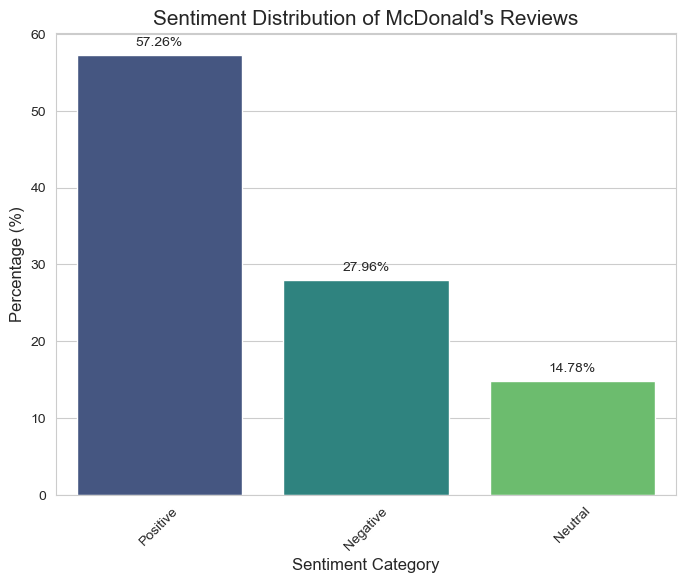

In [20]:
# Create a bar plot for sentiment distribution
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette="viridis")

# Add title and labels to the plot
plt.title('Sentiment Distribution of McDonald\'s Reviews', fontsize=15)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels to improve readability

# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f') + '%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

# Display the plot
plt.show()
